### Downloading dataset

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.8/702.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import display,Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1FEF8NQWQdSKyebINzzA")
project = rf.workspace("jb-ytltt").project("webpage-elements")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.5, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to webpage-elements-1 in yolov8:: 100%|██████████| 2424/2424 [00:00<00:00, 5312.36it/s]


In [ ]:
!nvidia-smi

Thu Jan 25 11:04:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8l.pt conf=0.25 source=/content/dataset/train/images/500px_com_png_jpg.rf.ad1f1ceae38e702898c14ffdc925931e.jpg save=True

/content
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l summary (fused): 268 layers, 43668288 parameters, 0 gradients, 165.2 GFLOPs

image 1/1 /content/dataset/train/images/500px_com_png_jpg.rf.ad1f1ceae38e702898c14ffdc925931e.jpg: 640x640 3 persons, 63.0ms
Speed: 2.9ms preprocess, 63.0ms inference, 746.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


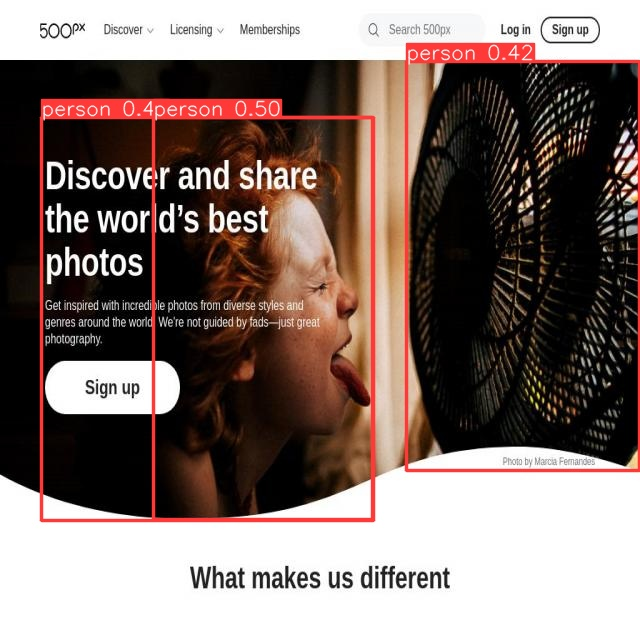

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/500px_com_png_jpg.rf.ad1f1ceae38e702898c14ffdc925931e.jpg',height=600)

## Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data= data.yaml epochs=130 imgsz=640 plots=True

/content
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=130, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=data.yaml

/content
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 260 images, 0 backgrounds, 0 corrupt: 100% 260/260 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/valid/images/commons_wikimedia_org_png_jpg.rf.ebb4234f59c1256b670a60ca6da801e6.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/valid/images/deondernemer_nl_png_jpg.rf.1c3deb9a0d80c09c41eaaf63b1d3cd36.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/valid/images/elle_com_png_jpg.rf.fa64ca3ad2e4104b4c066508f206e0f1.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/datasets/valid/images/explorestlouis_com_png_jpg.rf.9592754c54d66e4c90d8114d8aea8fd0.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/valid/images/ey_com_png_jpg.rf.747a3ccf4381bfb6e9b05cd1468cd375.jpg: 5 duplicate labels removed
val: WARNING 

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/datasets/test/images save=True

/content
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs

image 1/107 /content/datasets/test/images/7-zip_org_png_jpg.rf.5d5606e6ea0f29846b04613cc1b7518c.jpg: 640x640 9 buttons, 8 fields, 5 headings, 1 image, 20 links, 33 texts, 59.0ms
image 2/107 /content/datasets/test/images/adidas_com_png_jpg.rf.62cb6267d96de4081589dc21bf2b5094.jpg: 640x640 1 button, 2 headings, 1 link, 2 texts, 53.7ms
image 3/107 /content/datasets/test/images/adweek_com_png_jpg.rf.c7edc840d60fe0f7a5f6717222475b7c.jpg: 640x640 1 button, 5 images, 53.5ms
image 4/107 /content/datasets/test/images/allrecipes_com_png_jpg.rf.a3843c13ee7d73f8712668a1e75b40d0.jpg: 640x640 17 buttons, 1 field, 8 headings, 11 images, 2 links, 5 texts, 49.5ms
image 5/107 /content/datasets/test/images/amnestyusa_org_png_jpg.rf.b862916fd6300e0405f833b0396c317b.jpg: 640x640 10 buttons, 1 image, 6 links, 2 texts, 34.9ms
image 6/

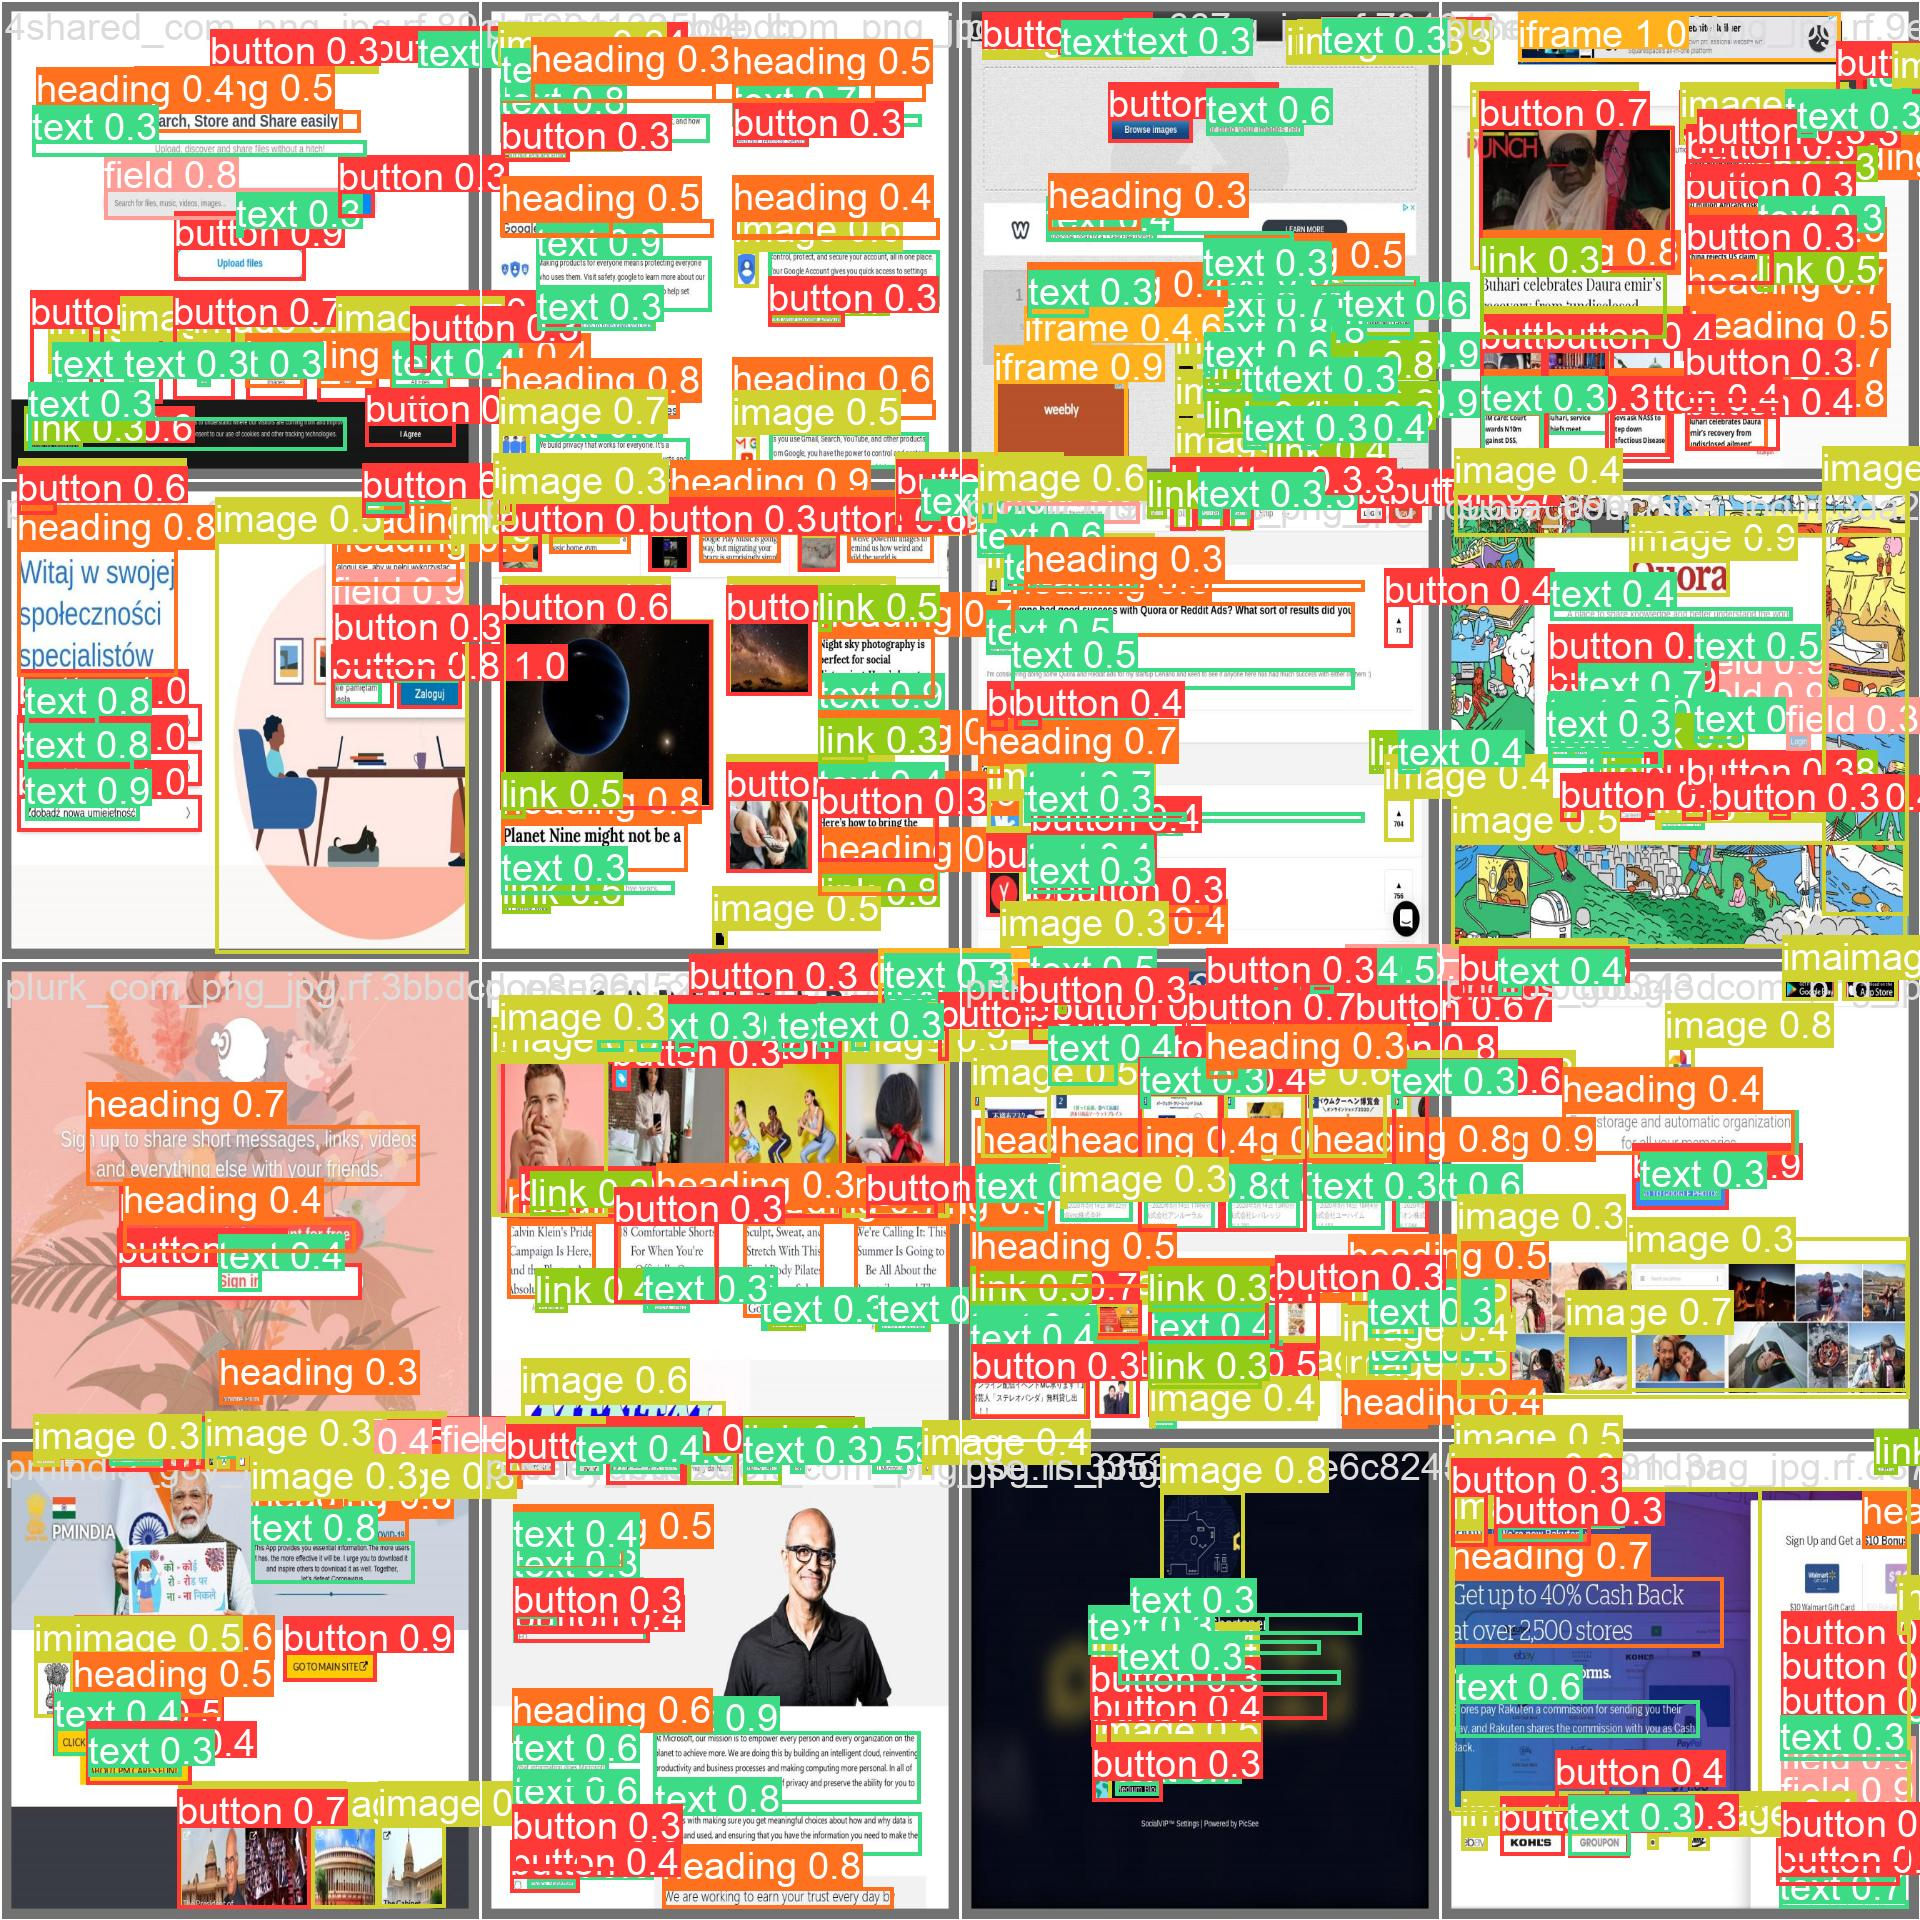

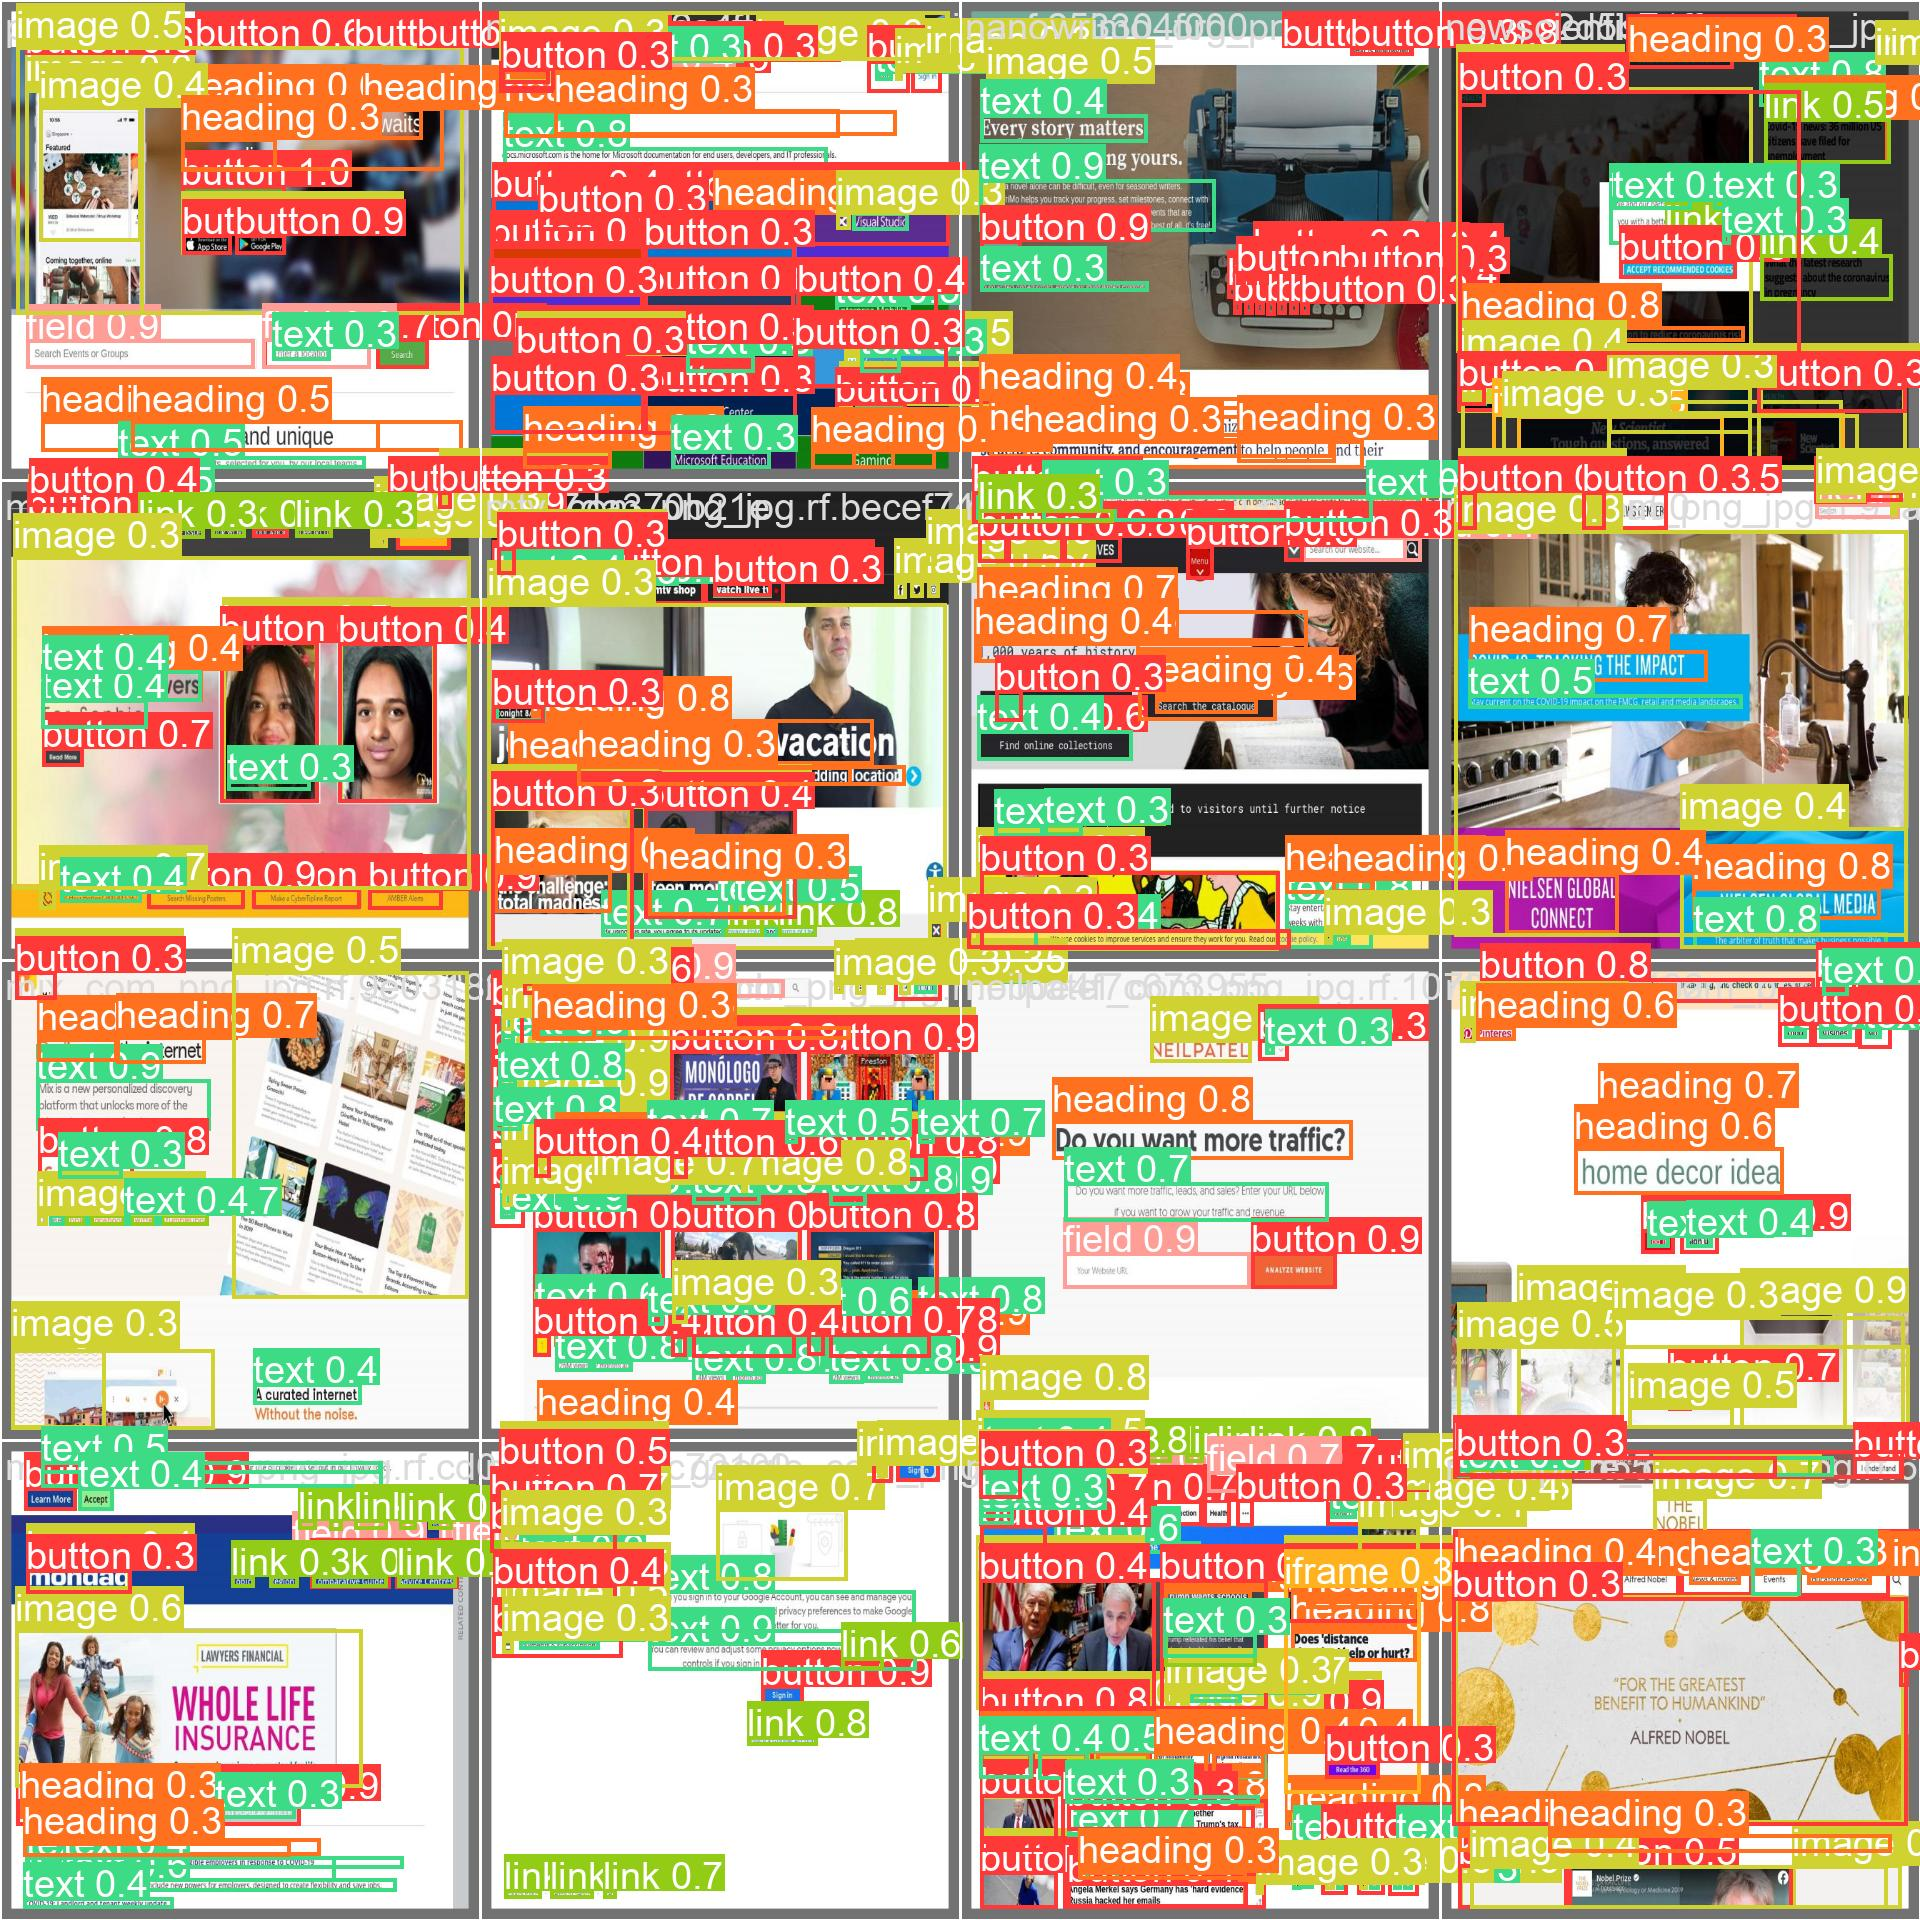

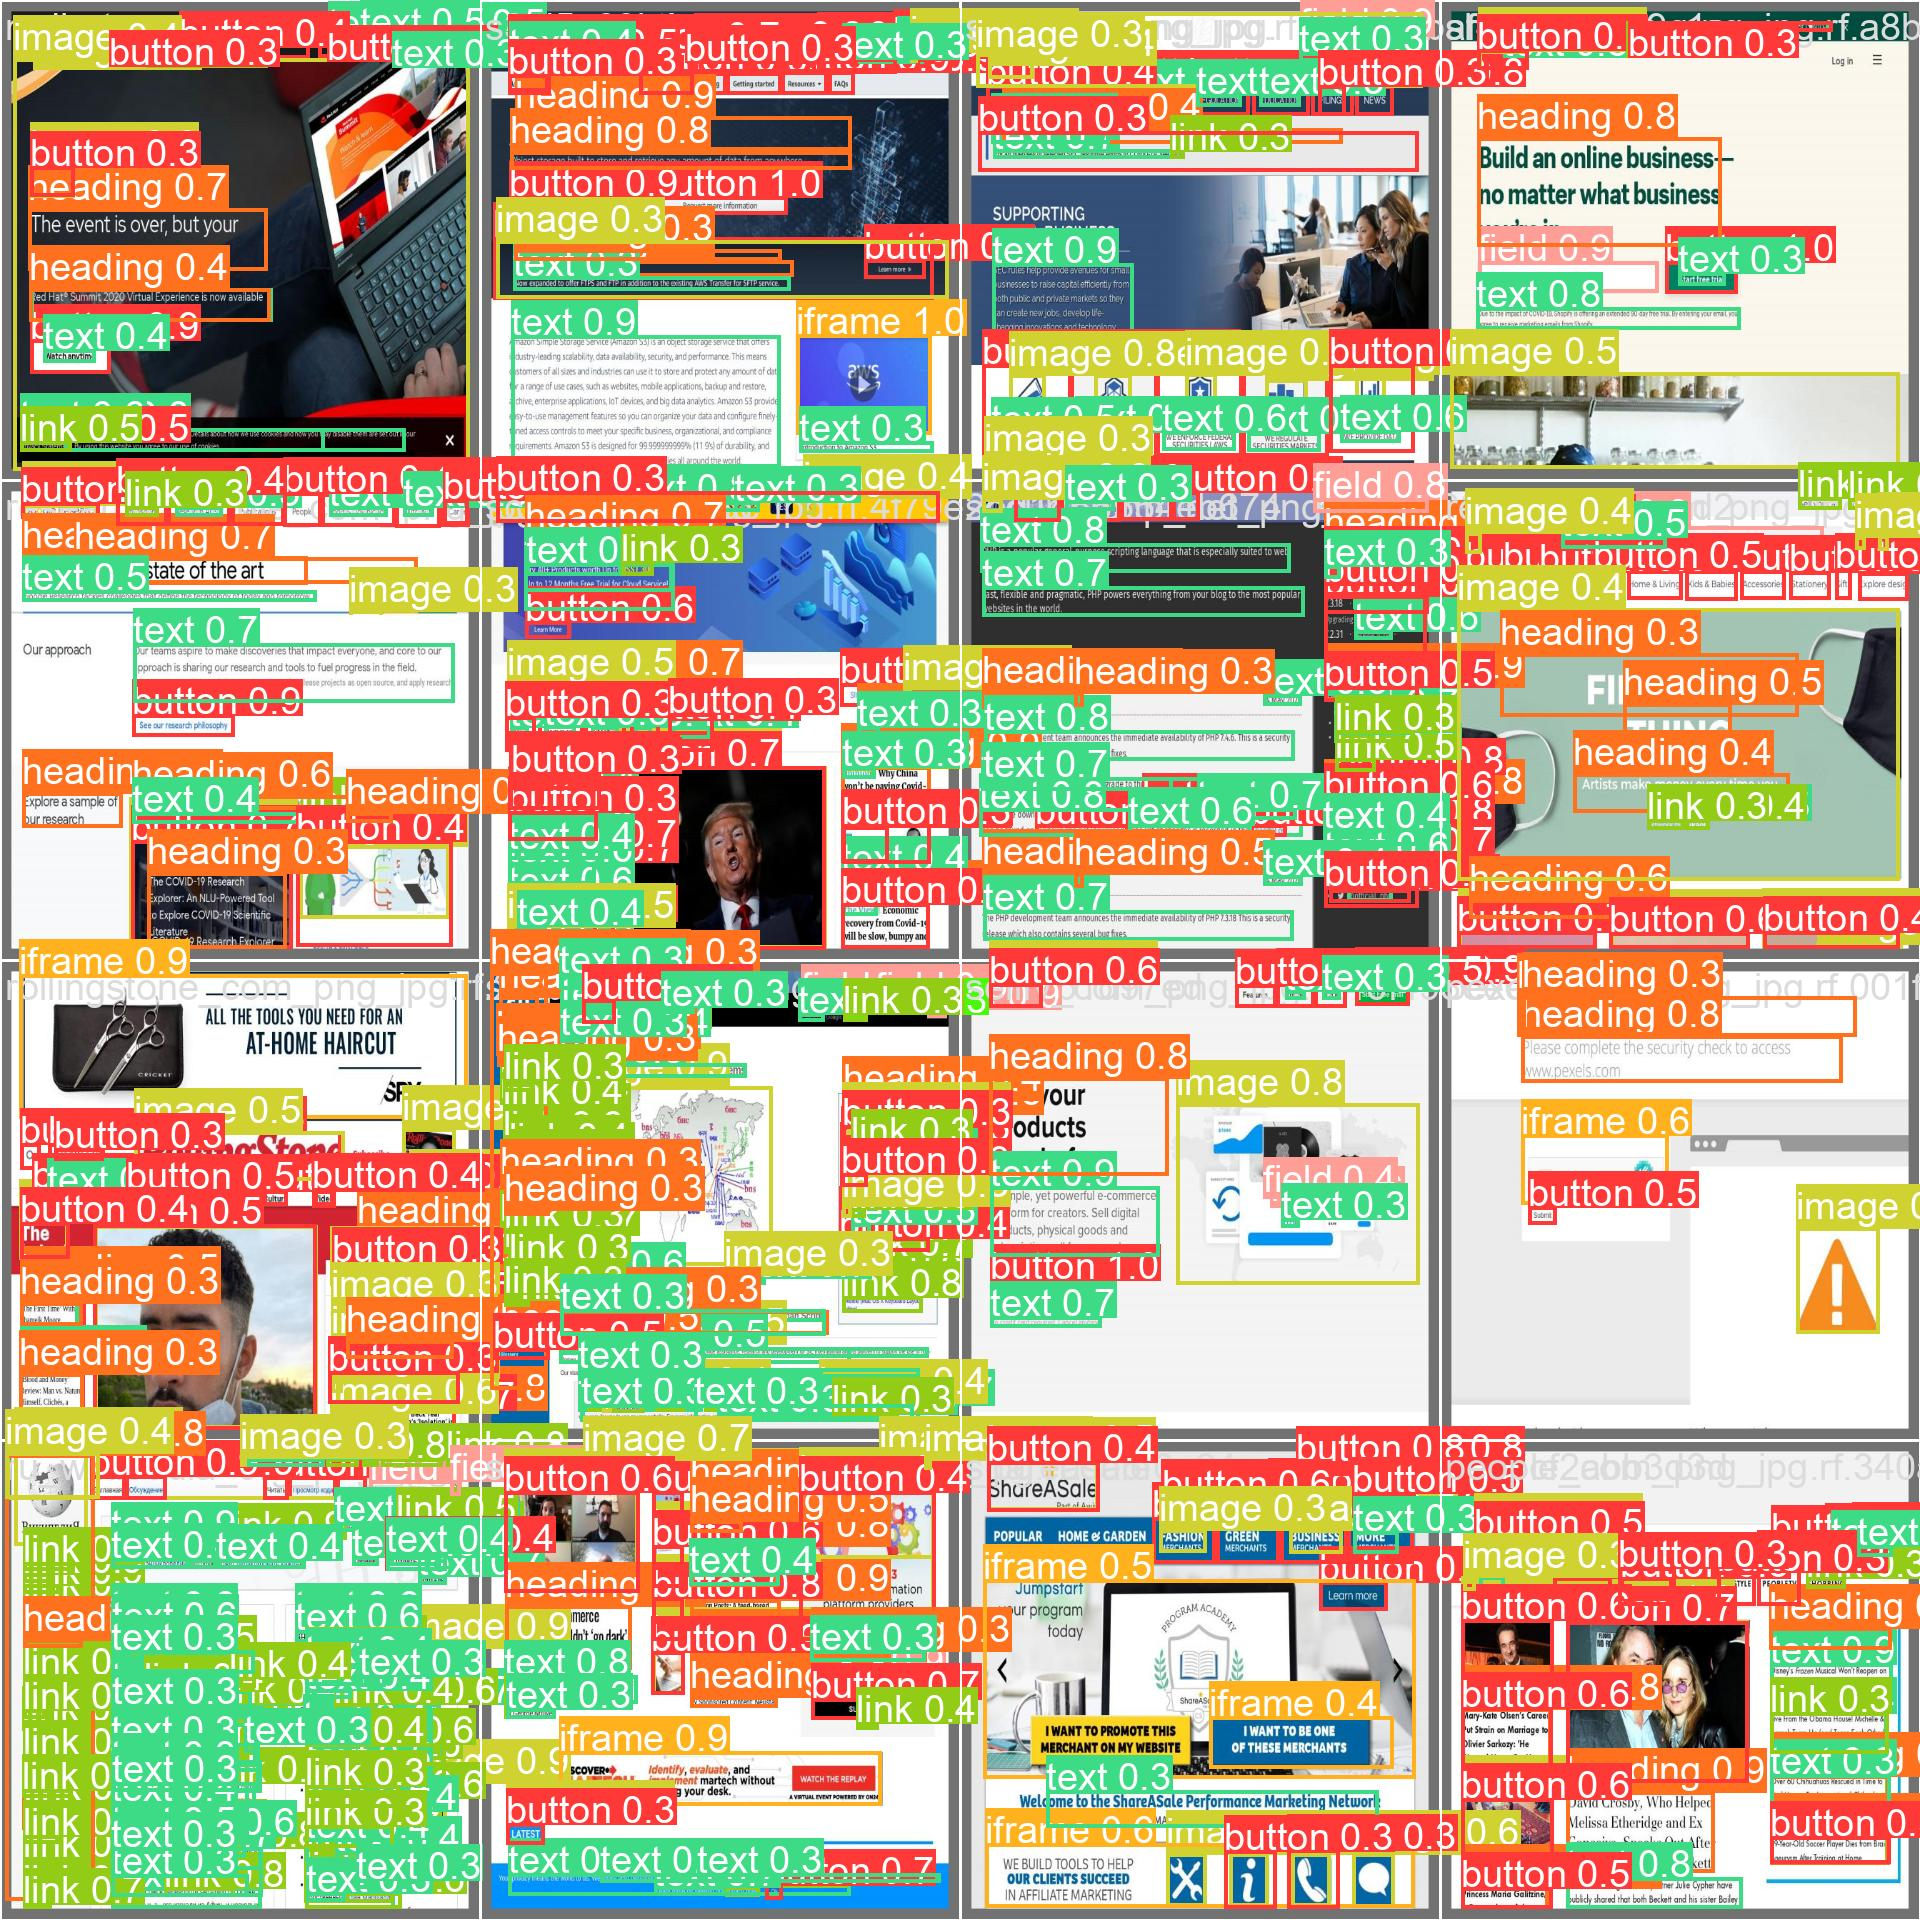

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/val/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!zip -r /content/file.zip /content

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.01.23/ (stored 0%)
  adding: content/.config/logs/2024.01.23/14.22.00.381506.log (deflated 58%)
  adding: content/.config/logs/2024.01.23/14.21.51.422026.log (deflated 86%)
  adding: content/.config/logs/2024.01.23/14.21.40.293653.log (deflated 58%)
  adding: content/.config/logs/2024.01.23/14.22.12.298214.log (deflated 56%)

In [ ]:
from google.colab import files
files.download('/content/file.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Upload a file using the Colab interface
file_name = 'file.zip'  # Replace with your file name

# Specify the destination folder in Google Drive
drive_folder = '/content/'

# Move the file from the Colab content folder to Google Drive
shutil.move(file_name, drive_folder + file_name)

print(f"{file_name} has been uploaded to {drive_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
file.zip has been uploaded to /content/


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/sample_images save=True

/content
Ultralytics YOLOv8.1.5 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43612776 parameters, 0 gradients, 164.8 GFLOPs

image 1/3 /content/sample_images/Screenshot 2024-01-25 155928.png: 640x416 3 buttons, 2 fields, 1 image, 132.0ms
image 2/3 /content/sample_images/Screenshot 2024-01-25 160018.png: 640x352 5 buttons, 1 field, 1 heading, 6 images, 70.6ms
image 3/3 /content/sample_images/Screenshot 2024-01-25 160149.png: 640x320 2 buttons, 3 fields, 85.1ms
Speed: 3.2ms preprocess, 95.9ms inference, 193.7ms postprocess per image at shape (1, 3, 640, 320)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


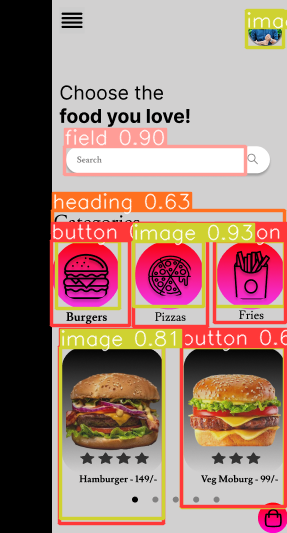

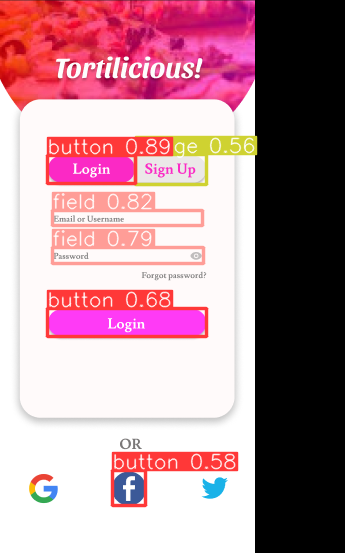

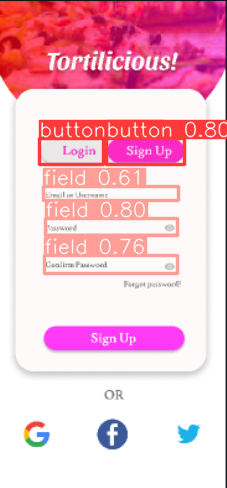

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.png')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")